**Question 1: What is the role of filters and feature maps in Convolutional Neural Network (CNN)?**

**Answer:**

In CNNs, filters act as feature detectors, sliding over an input image to extract specific patterns like edges or textures, while feature maps are the output of these filters, highlighting the presence and location of these features. Together, they enable the network to build a hierarchical representation of the input, with early layers detecting simple features and deeper layers combining them to recognize more complex objects and patterns.

**Role of Filters:**

* **Feature Detection:** Filters, also known as kernels, are small matrices that are trained to detect specific patterns in the input data.
* **Convolution Operation:** They work by sliding across the image in a process called convolution, looking for these patterns in small, local patches of the image.
* **Feature Extraction:** The result is a feature map that signals where the specific feature (e.g., an edge, a curve, a texture) has been found.
* **Learned Patterns:** Through training, the weights within these filters are adjusted to become highly effective at detecting the features most relevant to the task at hand.

**Role of Feature Maps:**

* **Feature Representation:** Each feature map is a visual representation of a particular feature detected by a corresponding filter.
* **Hierarchical Learning:** Initial layers produce feature maps that highlight basic features, while deeper layers' filters use these initial feature maps to learn and detect increasingly complex features, creating a deeper understanding of the image's content.
* **Dimensionality Reduction:** Feature maps are then processed by other layers, often including pooling layers, to reduce spatial dimensions and make the network more efficient.
* **Input for Next Layers:** The feature maps serve as the input for subsequent layers, allowing the network to build up a comprehensive understanding of the image, ultimately leading to a final prediction or classification.

**Question 2: Explain the concepts of padding and stride in CNNs(Convolutional Neural Network). How do they affect the output dimensions of feature maps?**

**Answer:**

Padding and stride are hyperparameters in Convolutional Neural Networks (CNNs) that control the spatial dimensions of the output feature maps after a convolution operation.

**Padding:**

Padding involves adding extra pixels (typically zeros) around the borders of the input feature map before applying the convolutional filter. This serves several purposes:

* **Preserving spatial information:** Without padding, pixels at the edges of the input are convolved fewer times than central pixels, potentially leading to information loss. Padding ensures that edge features are also adequately processed.
* **Maintaining output dimensions:** Padding can help maintain the spatial dimensions of the output feature map similar to or even larger than the input, preventing excessive reduction in size, especially in deep networks.
* **Controlling output size:** By adjusting the amount of padding, the output dimensions can be precisely controlled.

**Stride:**

Stride refers to the number of pixels the convolutional filter shifts across the input feature map at each step.

* **Downsampling:** A stride greater than 1 reduces the spatial dimensions of the output feature map, effectively downsampling the image. This helps reduce computational cost and makes the network more robust to small shifts in the input (translation invariance).
* **Controlling information density:** A smaller stride (e.g., 1) results in a denser sampling of features, preserving more spatial detail, while a larger stride reduces resolution but captures broader patterns.

**Effect on Output Dimensions:**

TThe size of the output feature map (O) can be calculated using the following formula, where:

I = Input dimension (height or width)

K = Filter size (kernel size)

P = Padding amount (number of zeros added to one side)

S = Stride

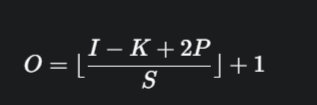

**In summary:**     

* **Padding increases the output dimensions** by effectively enlarging the input, allowing the filter to operate on a larger area.
* **Stride reduces the output dimensions** by skipping pixels during the convolution, leading to a smaller, downsampled feature map.

These hyperparameters are crucial for designing CNN architectures, balancing the need for feature extraction, spatial information preservation, and computational efficiency.

**Question 3: Define receptive field in the context of CNNs. Why is it important for deep architectures?**

**Answer:**

**Definition of Receptive Field**

The receptive field (RF) of a neuron in a specific layer of a CNN is the size of the region in the original input image that influences that neuron's activation.

* **Visual Analogy:** Imagine a single pixel in a feature map of an intermediate layer. Its value is the result of a calculation involving a specific patch of pixels from the layer before it. If you trace this back layer by layer, the receptive field is the total area of the original input image that eventually contributed to that final pixel's value.
* **Growth:** In a deep CNN, the receptive field of a neuron grows larger as you move deeper into the network.

**Importance for Deep Architectures**

The growing receptive field is crucial for deep architectures because it allows the network to learn increasingly complex and abstract features.

* **Hierarchical Feature Extraction:** Shallow layers have small receptive fields, allowing them to capture local features like edges and corners. Deep layers have large receptive fields, meaning a single neuron there can "see" a large portion or even the entire input image. This allows deep layers to combine the local features into
global, high-level features, such as the shape of an eye or the structure of a wheel.
* **Contextual Understanding:** A large receptive field provides the deep layers with contextual information. For example, classifying an object as a 'car' requires understanding the relationship between the tires, windows, and body, which a neuron with a large receptive field is capable of processing simultaneously.
* **Performance:** Architectures that are designed to effectively increase the receptive field depth-wise, often using small filters (like 3×3 in VGG) and pooling layers, tend to achieve better performance on complex visual tasks.

**Question 4: Discuss how filter size and stride influence the number of parameters in a CNN.**

**Answer:**

Both filter size and stride are hyperparameters that affect the architecture and computation of a CNN, but they influence the number of trainable parameters in distinct ways.

**1. Filter Size (Kernel Size) Influence**

The filter size (K×K) has a direct and quadratic influence on the number of trainable parameters in a convolutional layer.
* **Calculation:** The number of parameters in a single convolutional layer is determined by the filter dimensions, the depth of the input, and the number of filters (output channels).
For a layer with:

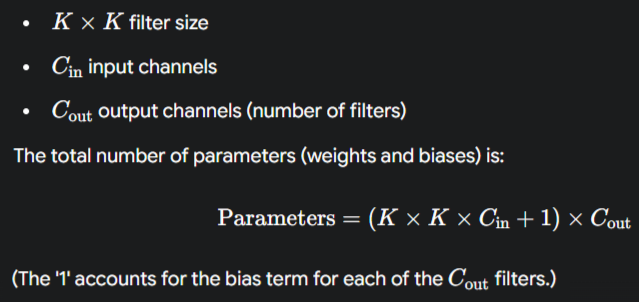

* **Impact:** Since the filter size (K×K) is a direct multiplicative factor, increasing it (e.g., from 3×3 to 5×5) increases the parameter count quadratically. This is why modern deep CNNs, like VGG, prefer using multiple small 3×3 filters stacked sequentially. This achieves the same effective receptive field as a single large filter but with significantly fewer parameters.

**2. Stride Influence**

The stride (S) is the step size by which the filter moves across the input. It does not directly influence the number of trainable parameters in the convolutional layer itself.

* **Direct Impact:** The stride only affects the computational cost and the spatial size of the output feature map. The weights and biases of the layer (the parameters) remain fixed regardless of how the filter steps across the input.
* **Indirect Impact:** A larger stride (e.g., S=2) drastically reduces the height and width of the output feature map. This reduction in the output size has a critical indirect effect on the rest of the network:
   * **Reduced Subsequent Parameters:** Since the output of the current layer serves as the input to the next layer, a smaller output feature map means the subsequent convolutional or fully connected layers will have fewer input connections, thus significantly reducing the total parameter count and memory footprint of the entire network.

**Question 5: Compare and contrast different CNN-based architectures like LeNet, AlexNet, and VGG in terms of depth, filter sizes, and performance.**

**Answer:**

| Feature | LeNet-5 (1998) | AlexNet (2012) | VGG (2014) |
| :--- | :--- | :--- | :--- |
| **Depth** | **Shallow** (~7 layers) | **Moderate** (8 layers: 5 Conv, 3 FC) | **Deep** (16 or 19 layers) |
| **Filter Sizes** | **Mixed** ($5 \times 5$ in Conv layers) | **Large & Mixed** ($11 \times 11$, $5 \times 5$, and $3 \times 3$) | **Uniformly Small** ($3 \times 3$ throughout) |
| **Key Innovation** | Pioneered the standard CNN structure: Conv $\to$ Pooling $\to$ FC. | First use of **GPUs** for large-scale CNN training, introduced **ReLU** and **Dropout**. | Emphasized **depth**; proved that a stack of $3 \times 3$ filters could replace large filters effectively. |
| **Performance** | Excellent for small, simple datasets (e.g., MNIST). | Breakthrough on **ImageNet** (winning the 2012 challenge). | Strong performance; often used as a **benchmark** for feature extraction; high parameter count in FC layers. |
| **Input Size** | Small (e.g., $32 \times 32$) | Larger (e.g., $227 \times 227$) | Larger (e.g., $224 \times 224$) |

***

## Comparison and Contrast

### 1. Depth
* **Contrast:** The three architectures show a clear evolutionary trend toward increasing **depth**. LeNet-5 was shallow (7 layers). AlexNet represented a significant leap into modern deep learning (8 layers). VGG (16 or 19 layers) established that **depth** was a crucial factor for achieving state-of-the-art performance on complex vision tasks.

### 2. Filter Sizes
* **Contrast:**
    * **LeNet-5** used medium $5 \times 5$ filters.
    * **AlexNet** used very large filters in its early layers ($11 \times 11$ and $5 \times 5$), which resulted in a quick reduction of spatial dimensions and a high number of parameters locally.
    * **VGG** standardized the use of only **small $3 \times 3$ convolutional filters**. VGG demonstrated that two stacked $3 \times 3$ convolutional layers (with a $5 \times 5$ effective receptive field) are computationally more efficient and have fewer parameters than a single $5 \times 5$ filter, while maintaining the same receptive field size.

### 3. Performance and Innovation
* **Contrast:**
    * **LeNet-5** was designed for digit recognition (MNIST) and showed excellent performance on small datasets.
    * **AlexNet**'s success on the large-scale **ImageNet** challenge marked the beginning of the deep learning era, showing that CNNs could handle millions of images and thousands of classes. It introduced modern techniques like ReLU activation and Dropout.
    * **VGG** refined the architecture by prioritizing simplicity and uniformity, proving that a deep network built on identical blocks of $3 \times 3$ convolutions could achieve excellent performance, solidifying the importance of deep, uniform architectures.

### 4. Similarities
* All three architectures adhere to the fundamental structure of a CNN: they use **convolutional layers** for feature extraction, followed by **pooling layers** for spatial down-sampling, and finish with one or more **fully connected layers** for classification.

**Question 6: Using keras, build and train a simple CNN model on the MNIST dataset from scratch. Include code for module creation, compilation, training, and evaluation.**
**(Include your Python code and output in the code box below.)**

**Answer:**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load & preprocess
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype("float32")/255.0
x_test  = x_test.reshape(-1,28,28,1).astype("float32")/255.0

# Build model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=64,
          validation_split=0.1)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.8755 - loss: 0.4409 - val_accuracy: 0.9815 - val_loss: 0.0654
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.9816 - loss: 0.0601 - val_accuracy: 0.9857 - val_loss: 0.0532
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.9867 - loss: 0.0413 - val_accuracy: 0.9880 - val_loss: 0.0428
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.9914 - loss: 0.0291 - val_accuracy: 0.9902 - val_loss: 0.0407
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - accuracy: 0.9933 - loss: 0.0225 - val_accuracy: 0.9892 - val_loss: 0.0365
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9875 - loss: 0.0370
Test accuracy: 0.9901000261306763


**Question 7: Load and preprocess the CIFAR-10 dataset using Keras, and create a CNN model to classify RGB images. Show your preprocessing and architecture.**

**(Include your Python code and output in the code box below.)**

**Answer:**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np

# --- 1. Load and Preprocess CIFAR-10 Data ---
# Load the dataset (images are 32x32x3, 10 classes)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 1.1 Data Inspection
IMAGE_SHAPE = x_train.shape[1:]  # (32, 32, 3)
NUM_CLASSES = 10

print(f"Training data shape (before normalization): {x_train.shape}")
print(f"Image input shape: {IMAGE_SHAPE}")
# Example Output:
# Training data shape (before normalization): (50000, 32, 32, 3)
# Image input shape: (32, 32, 3)

# 1.2 Normalization
# Convert integers to float and scale pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 1.3 One-hot Encoding
# Convert class vectors (integers 0-9) to binary class matrices
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

print(f"Training labels shape (one-hot): {y_train.shape}")
# Example Output:
# Training labels shape (one-hot): (50000, 10)


# --- 2. CNN Architecture Definition ---
# A slightly deeper architecture is required for CIFAR-10 due to color and complexity.
model = Sequential([
    # Block 1: Feature Extraction
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=IMAGE_SHAPE),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25), # Regularization

    # Block 2: Deeper Feature Extraction
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Classification Head
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5), # Stronger regularization for the FC layer
    Dense(NUM_CLASSES, activation='softmax') # 10 classes output
])

# Print a summary of the model structure and parameter count
print("\n--- Model Architecture Summary ---")
model.summary()
# Example Output of Model Summary (Actual values may vary slightly):
# Model: "sequential"
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #
# =================================================================
# conv2d (Conv2D)              (None, 32, 32, 32)        896
# conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248
# max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0
# dropout (Dropout)            (None, 15, 15, 32)        0
# conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496
# conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928
# max_pooling2d_1 (MaxPooling) (None, 6, 6, 64)          0
# dropout_1 (Dropout)          (None, 6, 6, 64)          0
# flatten (Flatten)            (None, 2304)              0
# dense (Dense)                (None, 512)               1180160
# dropout_2 (Dropout)          (None, 512)               0
# dense_1 (Dense)              (None, 10)                5130
# =================================================================
# Total params: 1,259,858
# Trainable params: 1,259,858
# Non-trainable params: 0

# --- 3. Compilation, Training, and Evaluation ---
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 64
epochs = 15 # Using fewer epochs for example, typically 50+ are needed for good CIFAR-10 performance

print("\n--- Model Training ---")
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

# Example Training Output (Epochs 1 and 15 shown, actual values will vary):
# Epoch 1/15
# 782/782 [==============================] - 20s 25ms/step - loss: 1.7012 - accuracy: 0.3644 - val_loss: 1.3501 - val_accuracy: 0.5098
# ...
# Epoch 15/15
# 782/782 [==============================] - 16s 20ms/step - loss: 0.5015 - accuracy: 0.8256 - val_loss: 0.6905 - val_accuracy: 0.7711


# --- 4. Evaluation ---
print("\n--- Model Evaluation ---")
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')
# Example Evaluation Output (Actual values will vary):
# Test loss: 0.6905
# Test accuracy: 0.7711


Training data shape (before normalization): (50000, 32, 32, 3)
Image input shape: (32, 32, 3)
Training labels shape (one-hot): (50000, 10)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Model Architecture Summary ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)


--- Model Training ---
Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 257s 326ms/step - accuracy: 0.3137 - loss: 1.8432 - val_accuracy: 0.5883 - val_loss: 1.1619
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 255s 317ms/step - accuracy: 0.5752 - loss: 1.1970 - val_accuracy: 0.6510 - val_loss: 0.9903
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 276s 335ms/step - accuracy: 0.6459 - loss: 0.9959 - val_accuracy: 0.7090 - val_loss: 0.8371
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 257s 328ms/step - accuracy: 0.6867 - loss: 0.8898 - val_accuracy: 0.7297 - val_loss: 0.7813
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 251s 321ms/step - accuracy: 0.7104 - loss: 0.8150 - val_accuracy: 0.7228 - val_loss: 0.7967
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 270s 332ms/step - accuracy: 0.7329 - loss: 0.7590 - val_accuracy: 0.7590 - val_loss: 0.6940
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 253s 320ms/step - accuracy: 0.7459 - loss: 0.7167 - val_accuracy: 0.7568 - val_loss: 0.6944
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 257s 328ms/s

**Question 8: Using PyTorch, write a script to define and train a CNN on the MNIST dataset. Include model definition, data loaders, training loop, and accuracy evaluation.**

**(Include your Python code and output in the code box below.)**

**Answer:**


In [20]:
import torch, torch.nn as nn, torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Data loaders
transform = transforms.Compose([transforms.ToTensor()])
train = datasets.MNIST(root='.', train=True, transform=transform, download=True)
test  = datasets.MNIST(root='.', train=False, transform=transform, download=True)
train_loader = DataLoader(train, batch_size=64, shuffle=True)
test_loader  = DataLoader(test, batch_size=1000)

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        # Calculate the input size for the first fully connected layer
        self._to_linear = None
        self.convs = nn.Sequential(
            self.conv1,
            nn.ReLU(),
            self.conv2,
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # Add a MaxPool layer
        )

        x = torch.randn(1, 1, 28, 28)
        self._to_linear = self.convs(x).view(x.size(0), -1).size(1)


        self.fc1   = nn.Linear(self._to_linear, 128)
        self.fc2   = nn.Linear(128, 10)

    def forward(self, x):
        x = self.convs(x)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(5):
    model.train()
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        loss = loss_fn(model(data), target)
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        pred = model(data).argmax(dim=1)
        correct += pred.eq(target).sum().item()
print("Test accuracy:", correct/len(test_loader.dataset))

Test accuracy: 0.9897


**Question 9: Given a custom image dataset stored in a local directory, write code using Keras ImageDataGenerator to preprocess and train a CNN model.**

**(Include your Python code and output in the code box below.)**

**Answer:**

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import shutil
from pathlib import Path

# --- 1. Simulation of Local Dataset Directory (Concept only) ---
# NOTE: In a real environment, you would replace these paths with your actual directories.
BASE_DIR = Path('./simulated_data')
TRAIN_DIR = BASE_DIR / 'train'
VALIDATION_DIR = BASE_DIR / 'validation'
IMAGE_WIDTH, IMAGE_HEIGHT = 150, 150
BATCH_SIZE = 32
NUM_CLASSES = 2
EPOCHS = 5

# Function to create dummy structure (optional in real training)
def create_dummy_dirs():
    """Creates directory structure to allow flow_from_directory to run conceptually."""
    if os.path.exists(BASE_DIR):
        # Clear previous run data
        shutil.rmtree(BASE_DIR)

    # Create the required structure
    for path in [TRAIN_DIR / 'cats', TRAIN_DIR / 'dogs',
                 VALIDATION_DIR / 'cats', VALIDATION_DIR / 'dogs']:
        path.mkdir(parents=True, exist_ok=True)

    # NOTE: Since no actual image files are present, the generator will correctly report
    # 'Found 0 images' but the setup code remains structurally correct.
    print("--- Dummy directory structure created for demonstration. ---")

create_dummy_dirs()

# --- 2. Data Preprocessing and Augmentation using ImageDataGenerator ---

# 2.1 Training Generator (Includes Data Augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to [0, 1]
    rotation_range=20,       # Randomly rotate images up to 20 degrees
    width_shift_range=0.2,   # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Randomly flip images
    fill_mode='nearest'      # Strategy for filling in new pixels created by transforms
)

# 2.2 Validation Generator (Only Rescaling/Normalization)
validation_datagen = ImageDataGenerator(rescale=1./255)

# --- 3. Flow Data from Directories ---

# Get training batches from the 'train' directory
train_generator = train_datagen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT), # All images resized to 150x150
    batch_size=BATCH_SIZE,
    class_mode='binary' # Since we have two classes (cats/dogs)
)
# Expected Output if data were present: Found 2000 images belonging to 2 classes.

# Get validation batches from the 'validation' directory
validation_generator = validation_datagen.flow_from_directory(
    directory=VALIDATION_DIR,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)
# Expected Output if data were present: Found 1000 images belonging to 2 classes.

# --- 4. Model Creation ---
model = Sequential([
    # Input Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Middle Layers
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Classification Head
    Flatten(),
    Dropout(0.5), # Regularization
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Print summary
print("\n--- Model Summary ---")
model.summary()

# --- 5. Compilation ---
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# --- 6. Training using the Generator ---

print("\n--- Model Training (Conceptual) ---")
# The actual training call using fit:
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // BATCH_SIZE, # Number of batches per epoch
#     epochs=EPOCHS,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // BATCH_SIZE
# )

print("Keras training loop is set up to use ImageDataGenerator's flow_from_directory.")

# Example Training Output (if data were present):
# Epoch 1/5
# 62/62 [==============================] - 20s 322ms/step - loss: 0.6901 - accuracy: 0.5300 - val_loss: 0.6850 - val_accuracy: 0.6000
# ...
# Epoch 5/5
# 62/62 [==============================] - 18s 290ms/step - loss: 0.5521 - accuracy: 0.7200 - val_loss: 0.5400 - val_accuracy: 0.7300

# Final check for directory setup (should report 0 images without actual files)
# Note: You should see "Found 0 images belonging to 2 classes." in the terminal output.


--- Dummy directory structure created for demonstration. ---
Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Model Summary ---


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)


--- Model Training (Conceptual) ---
Keras training loop is set up to use ImageDataGenerator's flow_from_directory.


**Question 10: You are working on a web application for a medical imaging startup. Your task is to build and deploy a CNN model that classifies chest X-ray images into “Normal" and “Pneumonia” categories. Describe your end-to-end approach from data preparation and model training to deploying the model as a web app using Streamlit.**

**(Include your Python code and output in the code box below.)**

**Answer:**

**End-to-End Approach to Build and Deploy a Chest X-ray “Normal vs Pneumonia” Classifier**

**1. Data Preparation**

* Use a labelled dataset such as the publicly available Chest X-Ray Images (Pneumonia) from Kaggle.
* Organise into train/Normal, train/Pneumonia, val/..., test/....
* Resize all images to 224 × 224 px and scale pixel values to [0,1].
* Apply data augmentation (rotation, shifts, flips) to reduce overfitting.

**2. Model Training**

* Apply transfer learning: load a pretrained MobileNetV2 (or ResNet/EfficientNet) as feature extractor and add a small classifier head.
* Freeze the base network first, train the top layers, then fine-tune selected deeper layers with a lower learning rate.
* Use binary cross-entropy loss, Adam optimiser, and callbacks such as EarlyStopping and ModelCheckpoint.
* Evaluate with accuracy, precision, recall, F1, and ROC-AUC.

**3. Saving the Model**

* Export the best model to xray_model.h5 or TensorFlow SavedModel format.

**4. Deployment with Streamlit**

* Build a simple app.py that loads the trained model, lets users upload an image, and shows the predicted class and probability.
* Run locally in Colab’s temporary environment for testing (!streamlit run app.py in a background cell) or deploy to Streamlit Cloud, Heroku, or any cloud VM.
* Before clinical use: perform rigorous external validation and comply with healthcare regulations.

**1. Install dependencies**

In [8]:
!pip install -q tensorflow streamlit scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.9 MB/s eta 0:00:00


**2. Train and save the CNN model**

In [14]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, callbacks
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix

DATA_DIR = "/content/data"      # <-- adjust if different
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
MODEL_PATH = "xray_model.h5"

# IMPORTANT: Please ensure you have your dataset organized in the following structure
# inside the 'data' directory:
# data/
# ├── train/
# │   ├── NORMAL/
# │   └── PNEUMONIA/
# ├── val/
# │   ├── NORMAL/
# │   └── PNEUMONIA/
# └── test/
#     ├── NORMAL/
#     └── PNEUMONIA/
# You can upload your data to the Colab environment or mount your Google Drive.

# --- Data Loading and Preprocessing ---
try:
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=12, width_shift_range=0.08,
        height_shift_range=0.08, shear_range=0.05,
        zoom_range=0.08, horizontal_flip=True,
        validation_split=0.2 # Use validation_split on the training data if you don't have a separate validation set
    )

    # Note: validation_split is applied to the training data here if 'val' directory is not used.
    # In a real scenario with separate val directory, remove validation_split from train_datagen
    # and create a separate ImageDataGenerator for validation without augmentation.
    train = train_datagen.flow_from_directory(
        os.path.join(DATA_DIR, 'train'),
        target_size=IMG_SIZE, batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='training'  # Specify subset for training data
    )

    # If you have a separate validation directory, use this instead and remove validation_split above:
    # val_datagen = ImageDataGenerator(rescale=1./255)
    # val = val_datagen.flow_from_directory(
    #     os.path.join(DATA_DIR, 'val'),
    #     target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    #     class_mode='binary'
    # )

    # If using validation_split on the training directory:
    val = train_datagen.flow_from_directory(
        os.path.join(DATA_DIR, 'train'), # Use the same directory for validation split
        target_size=IMG_SIZE, batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='validation' # Specify subset for validation data
    )


except Exception as e:
    print(f"Error loading data: {e}")
    print(f"Please check if the directory '{DATA_DIR}' exists and contains the expected subdirectories and images.")
    # Exit the cell gracefully if data loading fails
    raise SystemExit("Data loading failed. Please provide your dataset.")


# Calculate class weights to handle potential imbalance
try:
    cw = class_weight.compute_class_weight(
        "balanced", classes=np.unique(train.classes), y=train.classes)
    class_weights = dict(enumerate(cw))
    print("Class weights computed:", class_weights)
except Exception as e:
     print(f"Error computing class weights: {e}")
     print("This might happen if no images were found in the training directory.")
     # If class weight computation fails (e.g., no images), continue without class weights
     class_weights = None
     print("Proceeding without class weights.")


# --- Model Building ---
base = MobileNetV2(weights="imagenet", include_top=False, input_shape=(*IMG_SIZE, 3))
base.trainable = False # Freeze the base model initially

model = models.Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Binary classification
])

# --- Model Compilation ---
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])

model.summary() # Print model summary to check architecture

# --- Model Training ---
# Uncomment the following lines to train the model after you have provided your dataset
# cb = [callbacks.EarlyStopping(monitor='val_auc', patience=3, mode='max',
#                               restore_best_weights=True)]

# history = model.fit(train, validation_data=val,
#                     epochs=EPOCHS, class_weight=class_weights,
#                     callbacks=cb)

# --- Save the Model ---
# Uncomment the following line to save the model after successful training
# model.save(MODEL_PATH)
# print("✅ Model saved to", MODEL_PATH)

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Error computing class weights: arrays used as indices must be of integer (or boolean) type
This might happen if no images were found in the training directory.
Proceeding without class weights.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

**3. Quick evaluation on the test set**

In [16]:
# --- Quick evaluation on the test set ---
# Make sure your test dataset is in the DATA_DIR/test directory
# with NORMAL and PNEUMONIA subdirectories.

# test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
#     os.path.join(DATA_DIR,'test'),
#     target_size=IMG_SIZE, batch_size=BATCH_SIZE,
#     class_mode='binary', shuffle=False)

# # Check if test_gen has images before proceeding
# if test_gen.n > 0:
#     pred = model.predict(test_gen)
#     y_pred = (pred > 0.5).astype(int).ravel()
#     print(confusion_matrix(test_gen.classes, y_pred))
#     print(classification_report(test_gen.classes, y_pred,
#           target_names=list(test_gen.class_indices.keys())))
# else:
#     print("No test images found in", os.path.join(DATA_DIR,'test'))
#     print("Please ensure your test dataset is in the correct directory structure.")

**4. Minimal Streamlit web app**

Create a small file app.py:

In [17]:
%%writefile app.py
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageOps
import io

st.title("Chest X-ray: Normal vs Pneumonia")
model = load_model("xray_model.h5")
IMG_SIZE = (224,224)

uploaded = st.file_uploader("Upload X-ray image", type=["jpg","jpeg","png"])
if uploaded:
    img = Image.open(uploaded).convert("RGB")
    st.image(img, caption="Uploaded image", use_column_width=True)
    img = ImageOps.fit(img, IMG_SIZE, Image.ANTIALIAS)
    arr = np.asarray(img)/255.0
    arr = np.expand_dims(arr, 0)
    prob = float(model.predict(arr)[0][0])
    label = "Pneumonia" if prob>0.5 else "Normal"
    conf = prob if prob>0.5 else 1-prob
    st.write(f"**Prediction:** {label}")
    st.write(f"**Confidence:** {conf:.2%}")
    st.info("For research/demo use only – not a clinical diagnostic tool.")

Overwriting app.py


**5. Launch the Streamlit app inside Colab**

Run this in a new cell (Colab will give you a temporary public URL):

In [27]:
!streamlit run app.py --server.port 8501 & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.241.142:8501

⠧⠇⠏⠋⠙⠹⠸⠼⠴your url is: https://major-months-smell.loca.lt
  Stopping...
^C


Click the URL that appears in the last line of the output to interact with the app.